## Table of Contents

1. [About Project Euler](#About-Project-Euler)
2. [Disclaimer](#Disclaimer)
3. [Problem 61](#Problem-61)
4. [Required Modules](#Required-Modules)
5. [Main Solution](#Main-Solution)
6. [Big O Notation](#Big-O-Notation)

## About Project Euler <a name="About-Project-Euler"></a>


"Project Euler exists to encourage, challenge, and develop the skills and enjoyment of anyone with an interest in the fascinating world of mathematics."

For more info about the project please check [the official website](https://projecteuler.net/about).




## Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the Project Euler problem stated in the [Project Euler website](https://projecteuler.net). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of Project Euler, and all rights are reserved by them.

Please refrain from copying or reproducing this solution directly for any purpose that violates the copyright of Project Euler. Instead, use it as a reference or learning resource to enhance your problem-solving skills.

## Problem 61 <a name="Problem-61"></a>

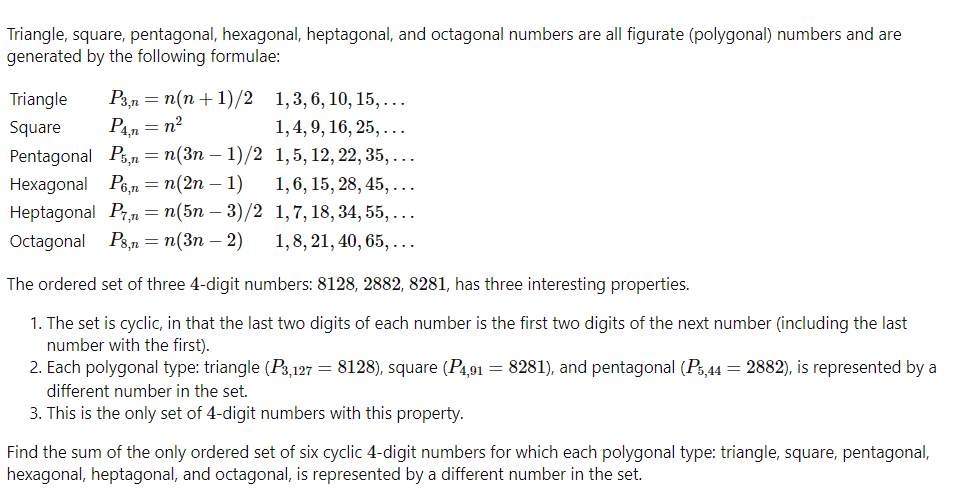

<br>
$**Hint**$

Like Problem 45, try to calculate $n$ with respect to $P$ for every Polygonal.


## Required Modules <a name="Required-Modules"></a>

In [ ]:
import time   #Capturing the execution time
from math import sqrt

## Main Solution <a name="Main-Solution"></a>

First we define our polygonal functions.

In [ ]:
def is_tri(P):
    n = (-0.5 + sqrt(0.25 + 2*P))
    return n == int(n)

def is_sqr(P):
    n = sqrt(P)
    return n == int(n)

def is_pen(P):
    n = (0.5 + sqrt(0.25 + 6*P))/3
    return n == int(n)

def is_hex(P):
    n = (0.5 + sqrt(0.25 + 2*P))/2
    return n == int(n)

def is_hep(P):
    n = (1.5 + sqrt(2.25 + 10*P))/5
    return n == int(n)

def is_oct(P):
    n = (1 + sqrt(1 + 3*P))/3
    return n == int(n)

We also have to define a function that checks all our numbers to be polygonal

In [ ]:
def is_all_polygonal(x):
    pad = [False] * 6
    for i in x:
        if is_oct(i):
            pad[-1] = True

        elif is_hep(i):
            pad[-2] = True

        elif is_hex(i):
            pad[-3] = True

        elif is_pen(i):
            pad[-4] = True

        elif is_sqr(i):
            pad[-5] = True

        elif is_tri(i):
            pad[-6] = True

    return all(pad)

Then we generate polygonals numbers and check the conditions.

In [ ]:
start_time = time.time()

polygonals = set()
for n in range(10**3, 10**4):
    if is_tri(n) or is_sqr(n) or is_pen(n) or is_hep(n) or is_oct(n):
        polygonals.add(n)

def answer():
  for n1 in polygonals:
    for n2 in polygonals:
      if str(n1)[2:] == str(n2)[:2]:
        for n3 in polygonals:
          if str(n2)[2:] == str(n3)[:2]:
            for n4 in polygonals:
              if str(n3)[2:] == str(n4)[:2]:
                for n5 in polygonals:
                  if str(n4)[2:] == str(n5)[:2]:
                    for n6 in polygonals:
                      if str(n5)[2:] == str(n6)[:2] and str(n6)[2:] == str(n1)[:2]:
                        output = set([n1,n2,n3,n4,n5,n6])
                        if is_all_polygonal(output):
                          return sum(output)

answer = answer()
end_time = time.time()
execution_time = end_time - start_time

print("Final Answer:",answer,"\nExecution time:","{:.4f}".format(execution_time), "seconds")

Final Answer: 28684 
Execution time: 0.8947 seconds


## Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

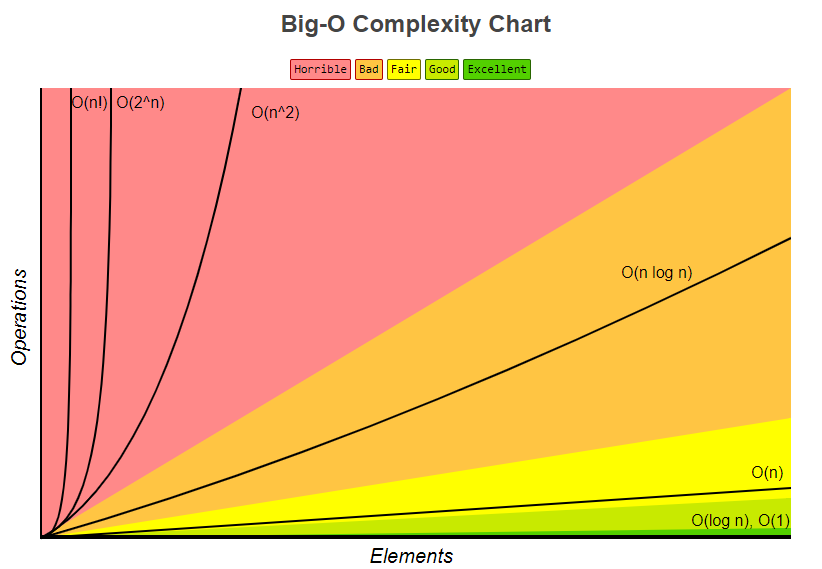

The time and space complexity of my code can be analyzed as follows:

1. Functions `is_tri`, `is_sqr`, `is_pen`, `is_hex`, `is_hep`, `is_oct`:
   - Each function performs a constant number of mathematical operations, so they all have a time complexity of $O(1)$.

2. Function `is_all_polygonal`:
   - The function iterates over the input set `x`, which has at most 6 elements.
   - Within the loop, it calls the respective polygonal functions and updates the elements of the `pad` list.
   - The overall time complexity of the function is $O(1)$ since the number of iterations is constant.

3. Building the `polygonals` set:
   - The code iterates over a range from $10^3$ to $10^4$, which has a constant size of 1000.
   - Within the loop, it checks if each number is a triangular, square, pentagonal, hexagonal, heptagonal, or octagonal number, and adds it to the `polygonals` set if true.
   - The time complexity of building the `polygonals` set is $O(1)$ since the loop iterates a constant number of times.

4. Function `answer`:
   - The function consists of nested loops, with each loop iterating over the `polygonals` set, which has at most 1000 elements.
   - The number of iterations in each loop is constant, so the time complexity of the function is $O(1)$.
   - Within the innermost loop, the code performs string manipulation and set operations, which have a negligible impact on the overall time complexity.

In summary, the overall **time complexity** of the code is $O(1)$ since the number of iterations and the size of data structures involved are constant.

Regarding space complexity, the code uses additional data structures such as the `polygonals` set and the `pad` list. The size of these data structures is constant, so the **space complexity** of the code is $O(1)$, indicating constant space usage.